<p style="padding:5px; margin:0; background-color:#89376b; color:#E2EEF3;font-family: 'Roboto'; font-size: 30px; text-align:center;border-radius: 30px 40px">Importing Libraries</p>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pickle5 as pickle

<p style="padding:5px; margin:0; background-color:#89376b; color:#E2EEF3;font-family: 'Roboto'; font-size: 30px; text-align:center;border-radius: 30px 40px">Reading the Data</p>

In [3]:
df = pd.read_csv(r"data\Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.shape

(374, 13)

<p style="padding:5px; margin:0; background-color:#89376b; color:#E2EEF3;font-family: 'Roboto'; font-size: 30px; text-align:center;border-radius:30px 40px">Data Cleaning</p>

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [9]:
df["Sleep Disorder"].fillna('Normal',inplace=True)

In [10]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<p style="padding:5px; margin:0; background-color:#89376b;color:#E2EEF3;font-family: 'Roboto'; font-size: 30px; text-align:center;border-radius: 30px 40px">Data Analysis</p>

In [12]:
plt.style.use('dark_background')

pink = "magenta"

In [13]:
df.drop(['Person ID'], axis=1).describe().style.background_gradient(cmap='RdPu')#Statistical Analysis(Numerical)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [14]:
df.describe(include='O').style.set_properties(**{'background-color': '#fae7f4', 'color': 'black'})#Statistical Analysis (Objects)

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,Normal
freq,189,73,195,99,219


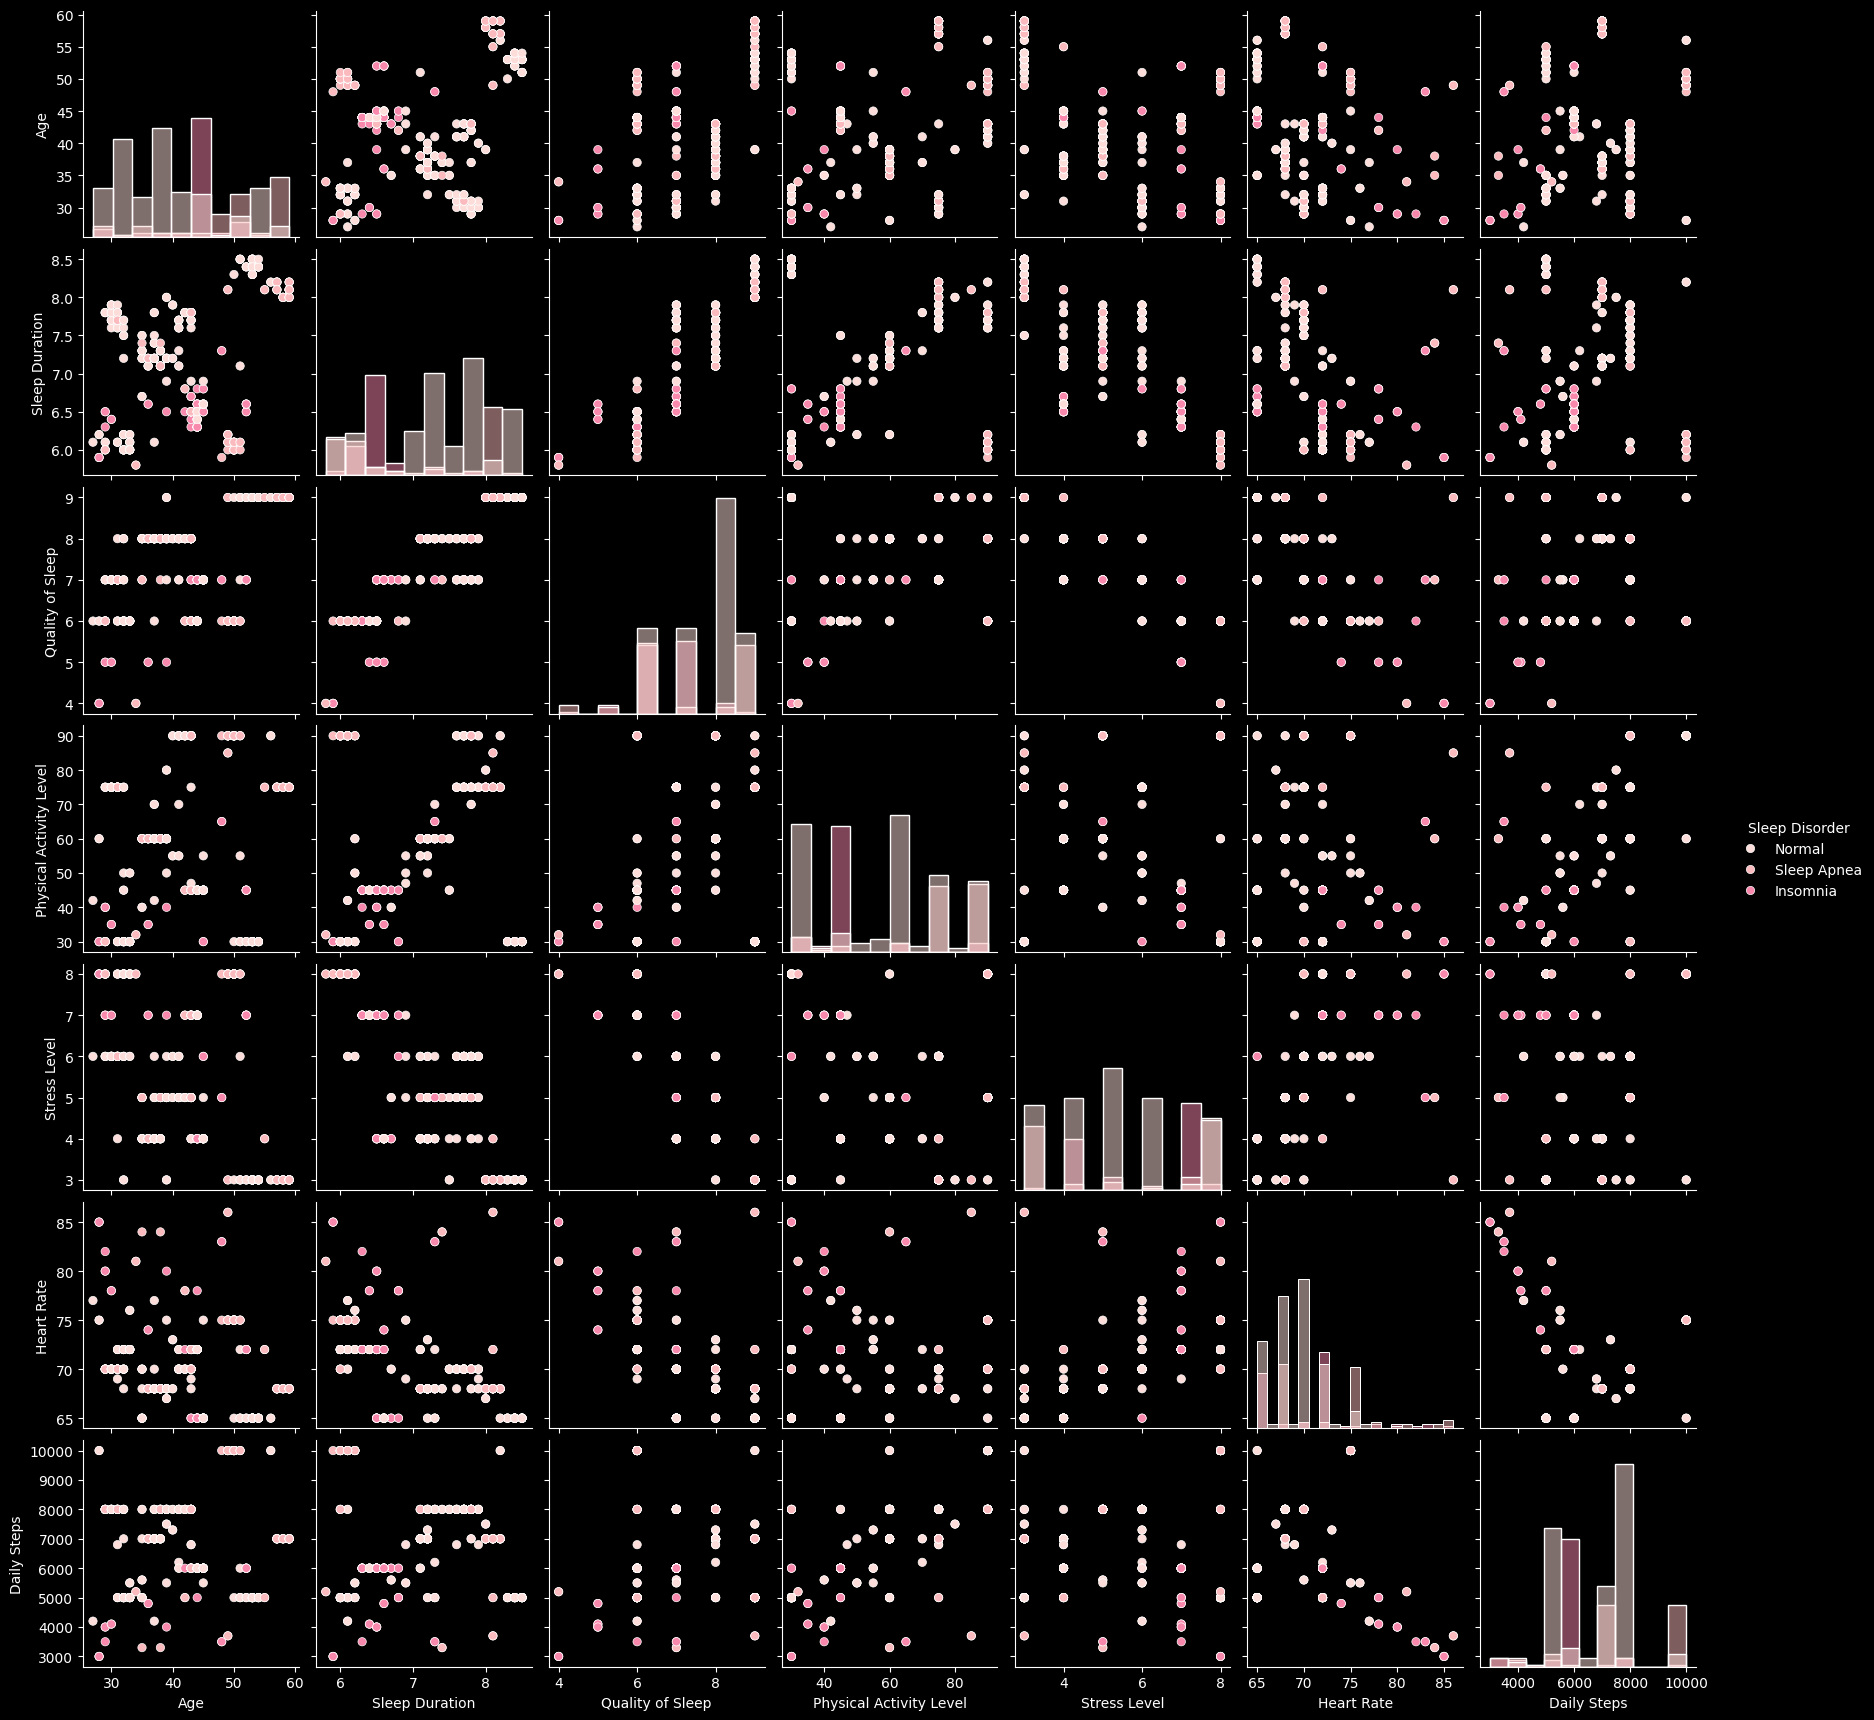

In [15]:
sns.set_palette('RdPu')
sns.pairplot(data=df.drop(['Person ID'], axis=1), hue='Sleep Disorder', diag_kind="hist")

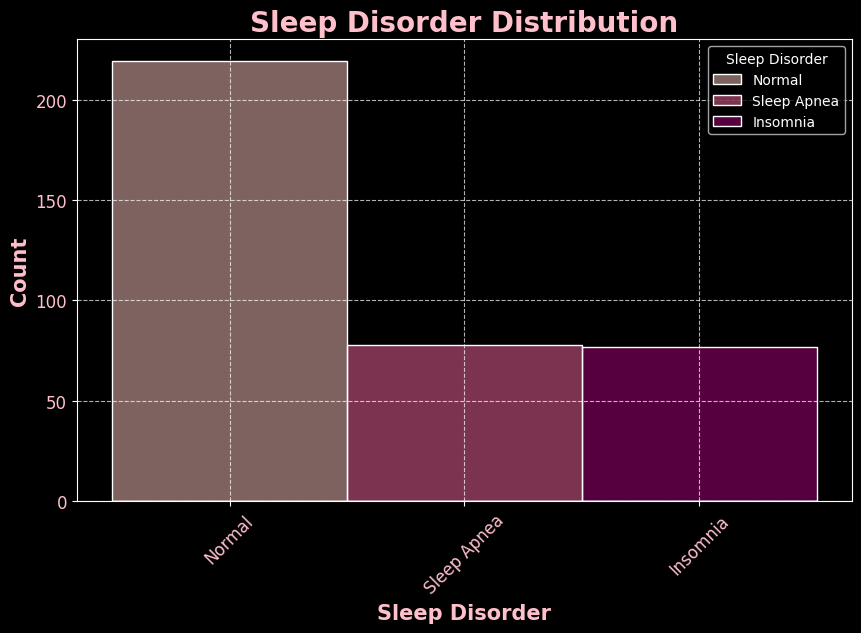

In [18]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='Sleep Disorder', hue='Sleep Disorder', palette='RdPu')

# Customize the plot
plt.title('Sleep Disorder Distribution', fontsize=20, fontweight='bold', color='pink')  # Set title
plt.xlabel('Sleep Disorder', fontsize=15, fontweight='bold', color='pink')  # Set x-axis label
plt.ylabel('Count', fontsize=15, fontweight='bold', color='pink')  # Set y-axis label
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.xticks(fontsize=12, rotation=45, color='pink')  # Rotate x-axis labels
plt.yticks(fontsize=12, color='pink')  # Set y-axis ticks font size

# Show the plot
plt.show()

In [19]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

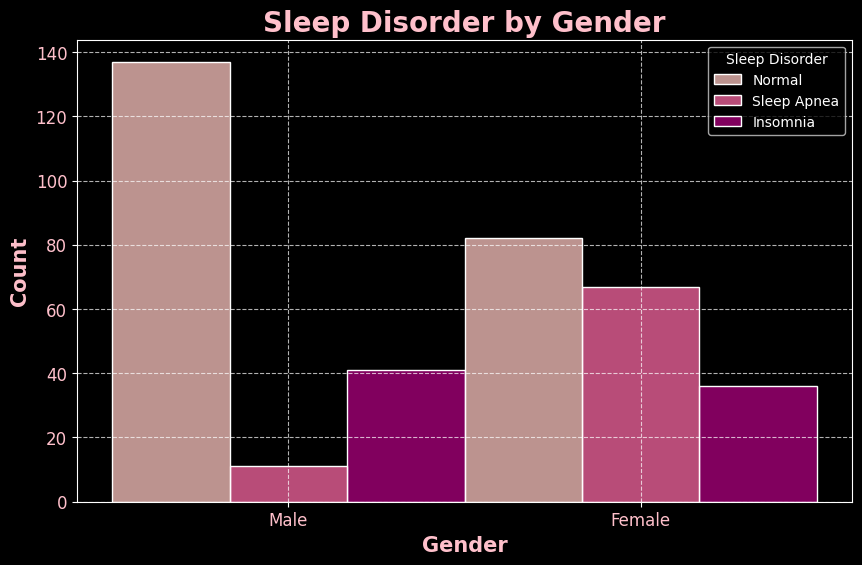

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Gender', hue='Sleep Disorder', multiple='dodge', palette='RdPu')

plt.title('Sleep Disorder by Gender', fontsize=20, fontweight='bold', color='pink')
plt.xlabel('Gender', fontsize=15, fontweight='bold', color='pink')  
plt.ylabel('Count', fontsize=15, fontweight='bold', color='pink')  
plt.grid(True, linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12, color='pink')  
plt.yticks(fontsize=12, color='pink')  

plt.show()

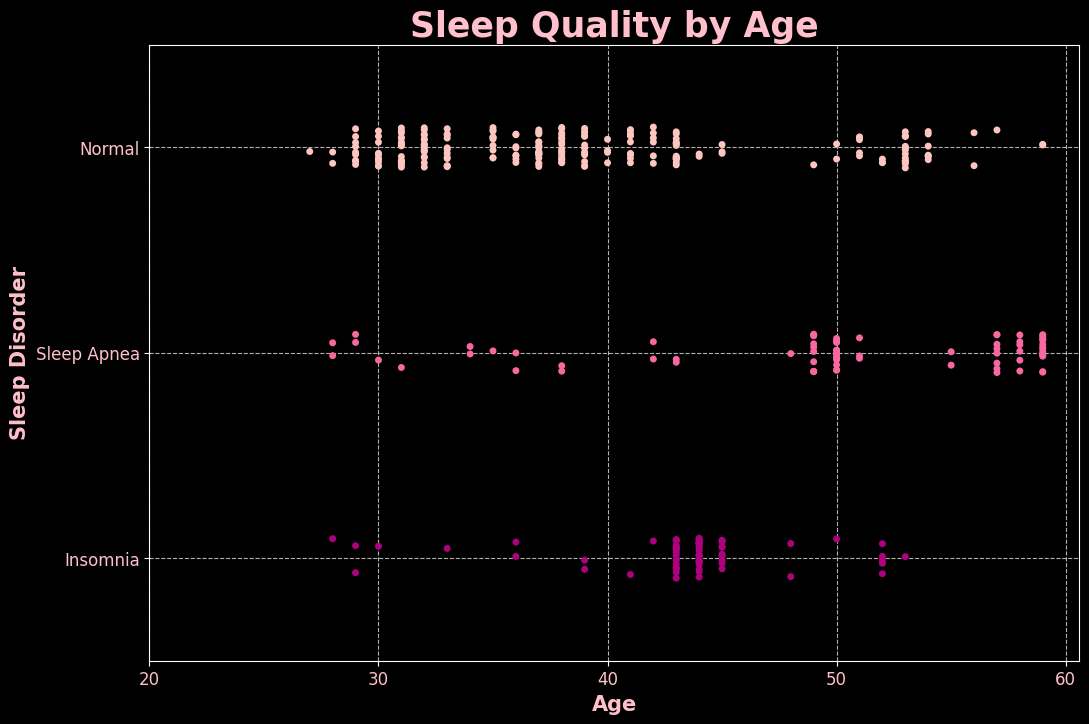

In [26]:
plt.figure(figsize=(12, 8))  
sns.stripplot(data=df, x='Age', y='Sleep Disorder', orient='h', hue='Sleep Disorder', palette='RdPu')

plt.title('Sleep Quality by Age', fontsize=25, fontweight='bold', color='pink')  
plt.xlabel('Age', fontsize=15, fontweight='bold', color='pink')  
plt.ylabel('Sleep Disorder', fontsize=15, fontweight='bold', color='pink') 
plt.xticks([20, 30, 40, 50, 60], ['20', '30', '40', '50', '60'], fontsize=12, color='pink') 
plt.yticks(fontsize=12, color='pink')  
plt.grid(True, linestyle='--', alpha=0.7)  

plt.show()

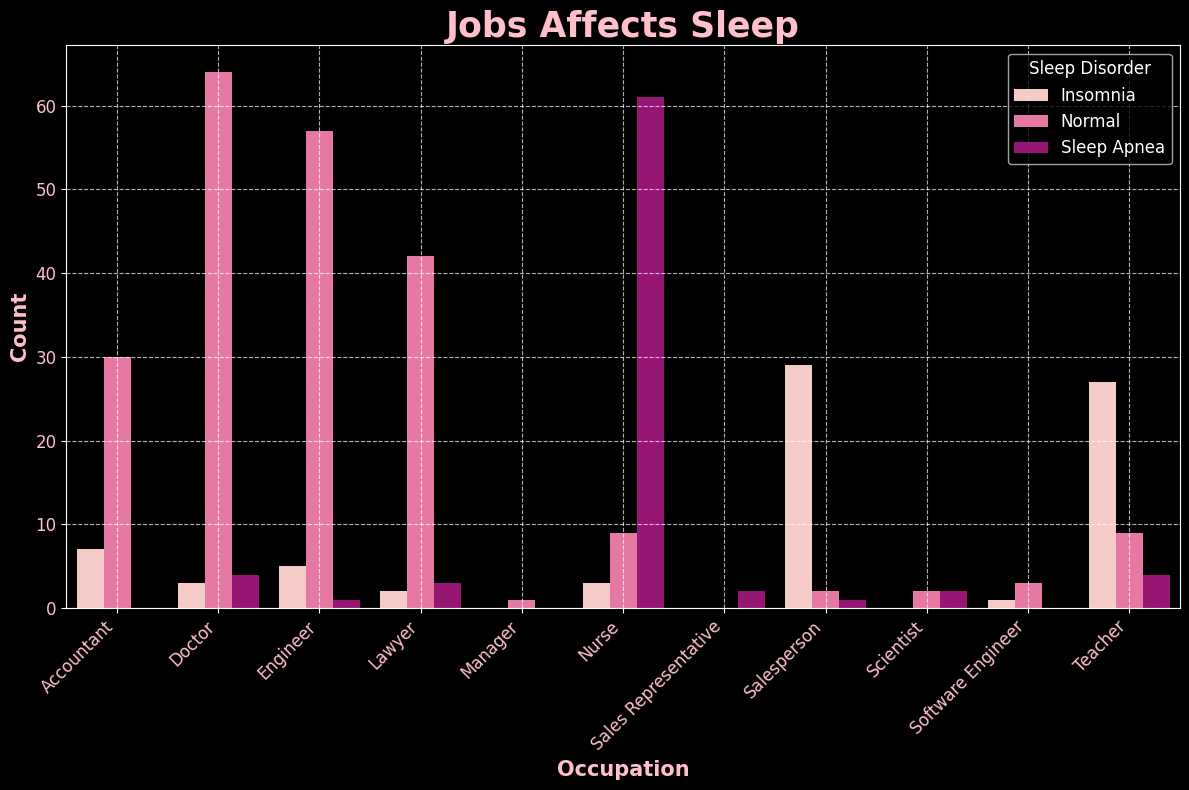

In [27]:
df_grouped = df.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_grouped, x='Occupation', y='Count', hue='Sleep Disorder', palette='RdPu')

plt.title('Jobs Affects Sleep', fontsize=25, fontweight='bold', color='pink')
plt.xlabel('Occupation', fontsize=15, fontweight='bold', color='pink')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='pink')
plt.xticks(rotation=45, ha='right', fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Sleep Disorder', title_fontsize='12', fontsize='12')
plt.tight_layout()
plt.show()

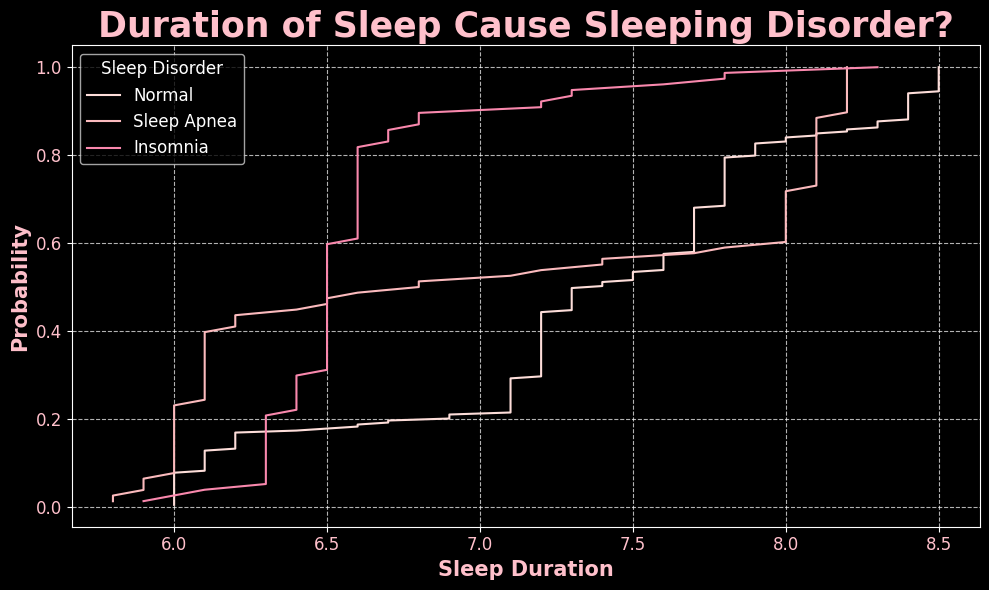

In [28]:
plt.figure(figsize=(10, 6))
for category in df['Sleep Disorder'].unique():
    subset = df[df['Sleep Disorder'] == category]['Sleep Duration']
    ecdf_x = np.sort(subset)
    ecdf_y = np.arange(1, len(ecdf_x) + 1) / len(ecdf_x)
    plt.plot(ecdf_x, ecdf_y, label=category)

plt.title('Duration of Sleep Cause Sleeping Disorder?', fontsize=25, fontweight='bold', color='pink')
plt.xlabel('Sleep Duration', fontsize=15, fontweight='bold', color='pink')
plt.ylabel('Probability', fontsize=15, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(title='Sleep Disorder', title_fontsize='12', fontsize='12')

plt.tight_layout()
plt.show()

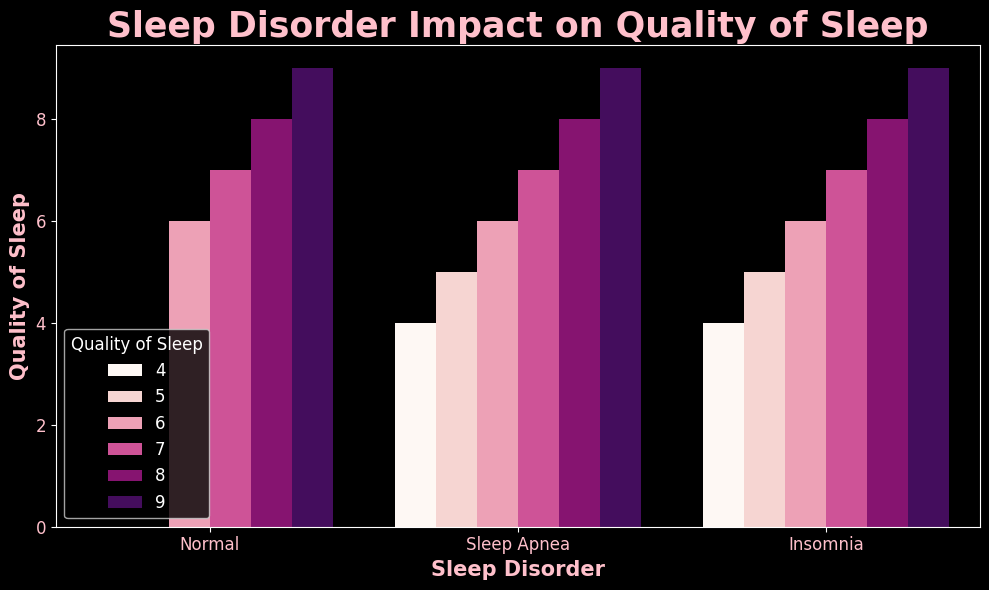

In [30]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Sleep Disorder', y='Quality of Sleep', hue='Quality of Sleep', palette='RdPu')

plt.title('Sleep Disorder Impact on Quality of Sleep', fontsize=25, fontweight='bold', color='pink')
plt.xlabel('Sleep Disorder', fontsize=15, fontweight='bold', color='pink')
plt.ylabel('Quality of Sleep', fontsize=15, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')
plt.legend(title='Quality of Sleep', title_fontsize='12', fontsize='12')

plt.tight_layout()
plt.show()

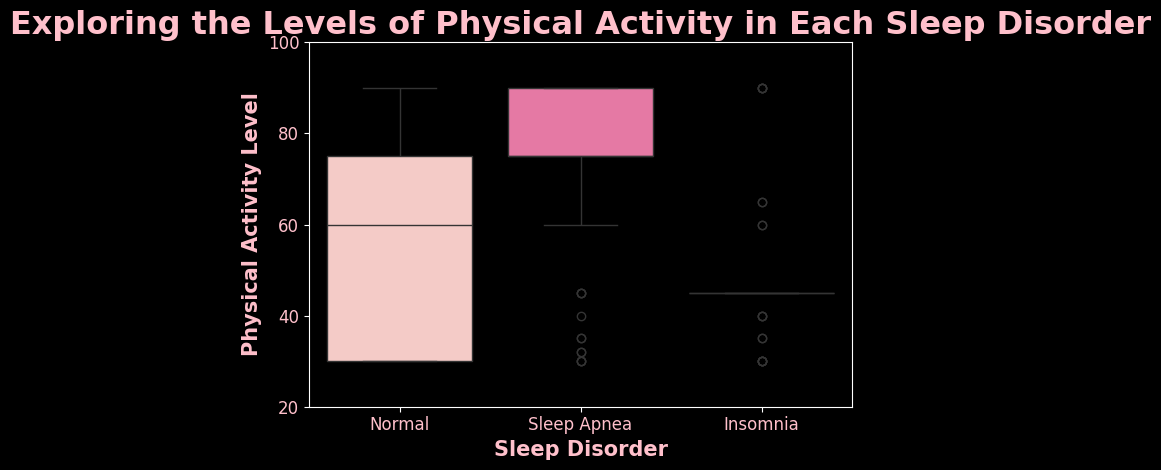

In [31]:
sns.boxplot(data=df, x='Sleep Disorder', y='Physical Activity Level', hue='Sleep Disorder',
               palette='RdPu')

plt.title('Exploring the Levels of Physical Activity in Each Sleep Disorder', fontsize=23, fontweight='bold', color='pink')
plt.xlabel('Sleep Disorder', fontsize=15, fontweight='bold', color='pink')
plt.ylabel('Physical Activity Level', fontsize=15, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks([20, 40, 60, 80, 100], fontsize=12, color='pink') 

plt.tight_layout()
plt.show()

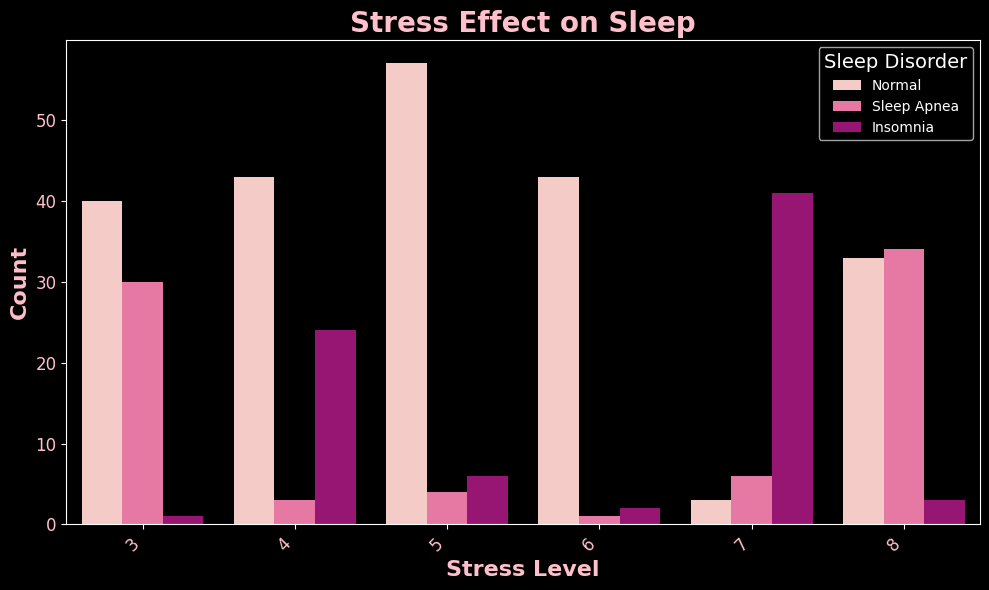

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Sleep Disorder', palette='RdPu')

plt.title('Stress Effect on Sleep', fontsize=20, fontweight='bold', color='pink')
plt.xlabel('Stress Level', fontsize=16, fontweight='bold', color='pink')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')

plt.legend(title='Sleep Disorder', title_fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

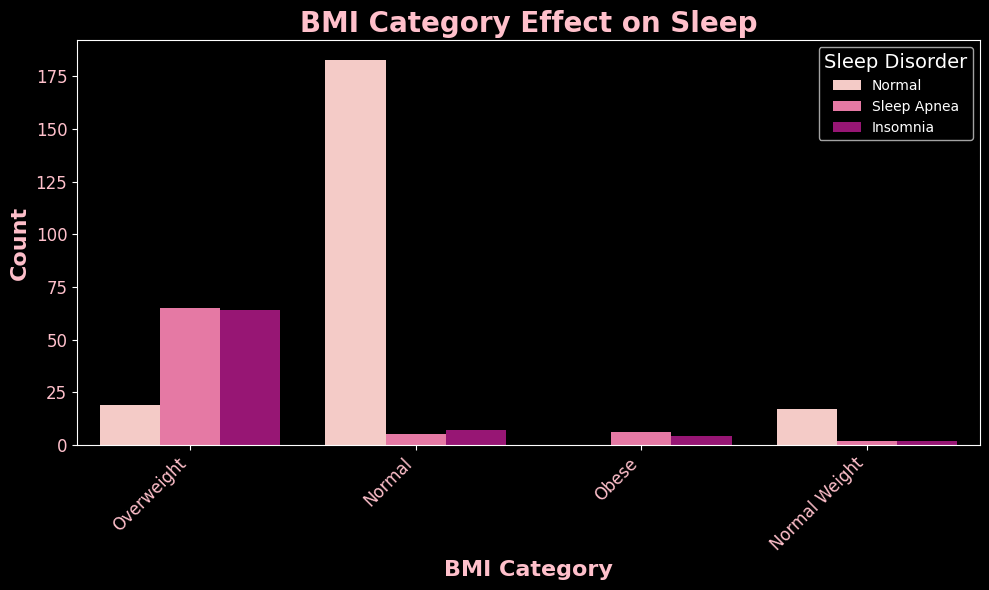

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='RdPu')

plt.title('BMI Category Effect on Sleep', fontsize=20, fontweight='bold', color='pink')
plt.xlabel('BMI Category', fontsize=16, fontweight='bold', color='pink')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')

plt.legend(title='Sleep Disorder', title_fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [53]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [54]:
def classify_blood_pressure(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    
    if (systolic <= 120 and diastolic <= 80) or (systolic <= 119 and diastolic <= 77):
        return 'Normal Blood Pressure'
    elif (121 <= systolic <= 129 and diastolic <= 84) or (81 <= diastolic <= 89):
        return 'Elevated Blood Pressure'
    elif systolic >= 140 or diastolic >= 90:
        return 'High Blood Pressure (Hypertension)'
    else:
        return 'Other'

df['Blood Pressure Classification'] = df.apply(classify_blood_pressure, axis=1)

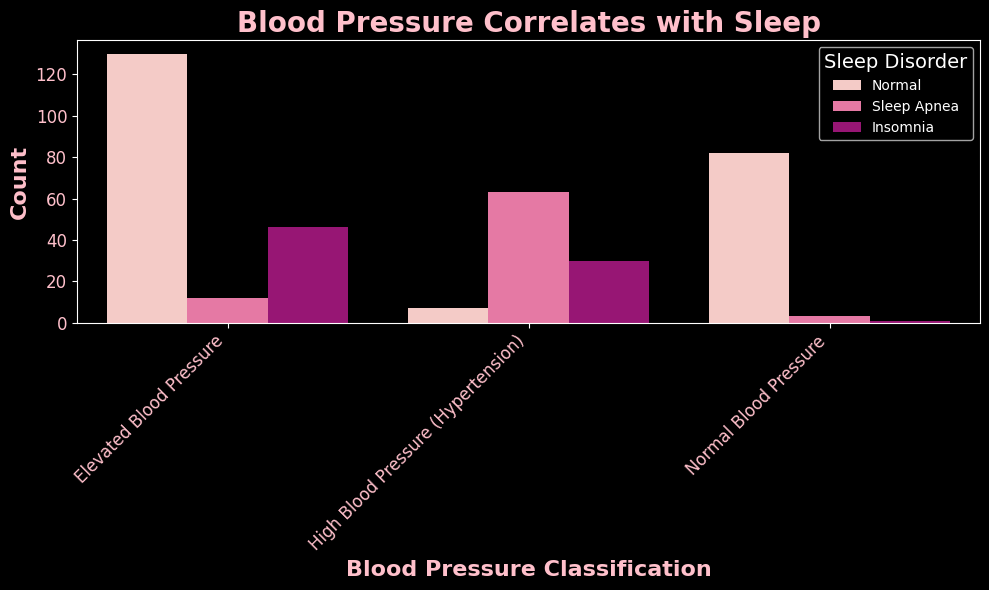

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Blood Pressure Classification', hue='Sleep Disorder', palette='RdPu')

plt.title('Blood Pressure Correlates with Sleep', fontsize=20, fontweight='bold', color='pink')
plt.xlabel('Blood Pressure Classification', fontsize=16, fontweight='bold', color='pink')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')

plt.legend(title='Sleep Disorder', title_fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

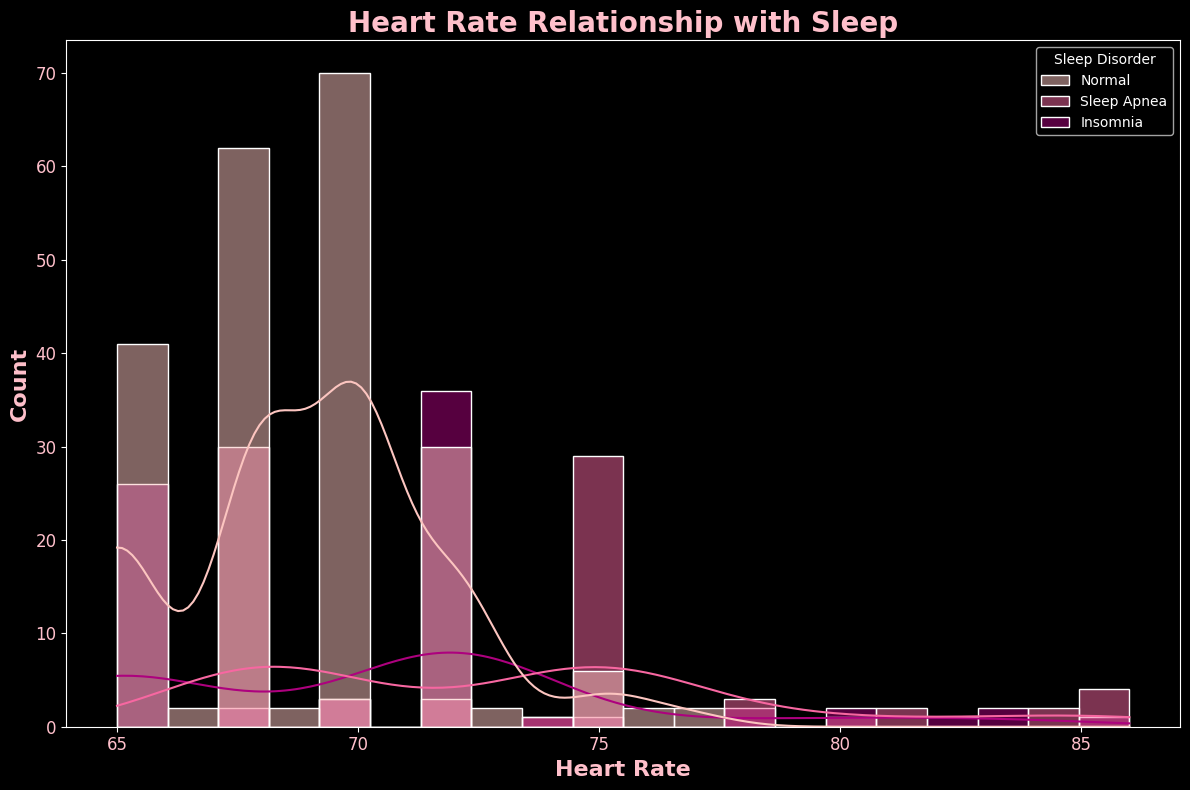

In [56]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Heart Rate', hue='Sleep Disorder', palette='RdPu', bins=20, kde=True)

plt.title('Heart Rate Relationship with Sleep', fontsize=20, fontweight='bold', color='pink')
plt.xlabel('Heart Rate', fontsize=16, fontweight='bold', color='pink')
plt.ylabel('Count', fontsize=16, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')

plt.tight_layout()
plt.show()

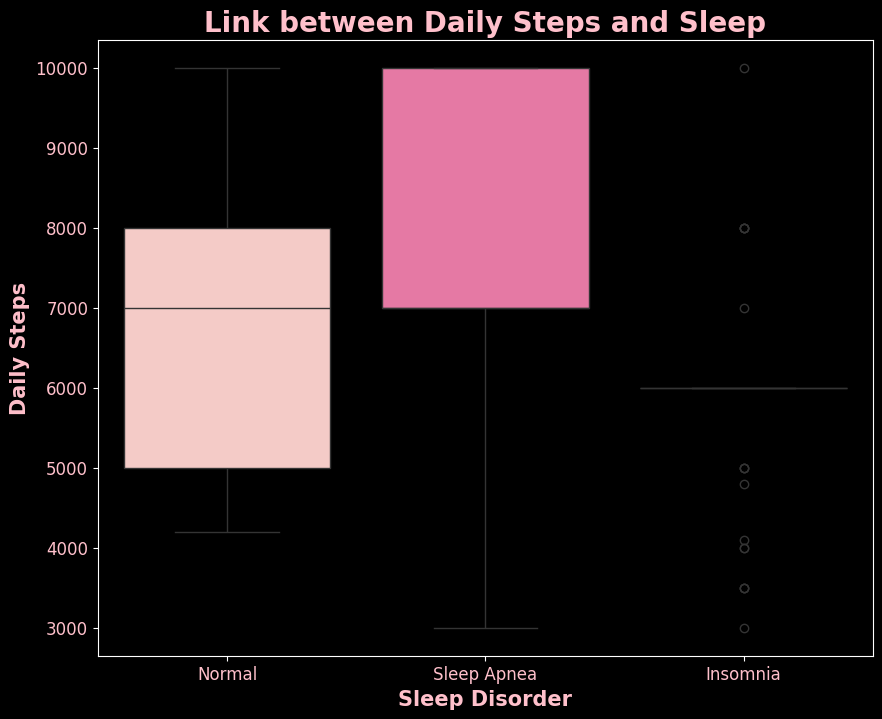

In [57]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Sleep Disorder", y="Daily Steps", hue='Sleep Disorder', palette="RdPu")

plt.title('Link between Daily Steps and Sleep', fontsize=20, fontweight='bold', color='pink')
plt.xlabel('Sleep Disorder', fontsize=15, fontweight='bold', color='pink')
plt.ylabel('Daily Steps', fontsize=15, fontweight='bold', color='pink')
plt.xticks(fontsize=12, color='pink')
plt.yticks(fontsize=12, color='pink')

plt.show()

<p style="padding:5px; margin:0; background-color:#89376b; color:#E2EEF3;font-family: 'Roboto'; font-size: 30px; text-align:center;border-radius: 30px 40px">Data Preprocessing</p>

In [38]:
def categorize_age(age):
    if 20 <= age < 30:
        return "20s"
    elif 30 <= age < 40:
        return "30s"
    elif 40 <= age < 50:
        return "40s"
    else:
        return "50s"
df['Age'] = df['Age'].apply(categorize_age)

In [39]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [40]:
df["BMI Category"].replace('Normal', 'Normal Weight', inplace=True)

In [41]:
df.drop(['Person ID', 'Blood Pressure'], axis=1, inplace=True)

In [42]:
df.to_csv(r'data\cleaned_data.csv', index=False)

In [43]:
le =LabelEncoder()
object_data = df.select_dtypes(include=['object'])
for i in range(object_data.shape[1]):
    object_data.iloc[: ,i] = le.fit_transform(object_data.iloc[: ,i])

In [44]:
num_data = df.select_dtypes(exclude=['object'])
df = pd.concat([object_data, num_data], axis=1)

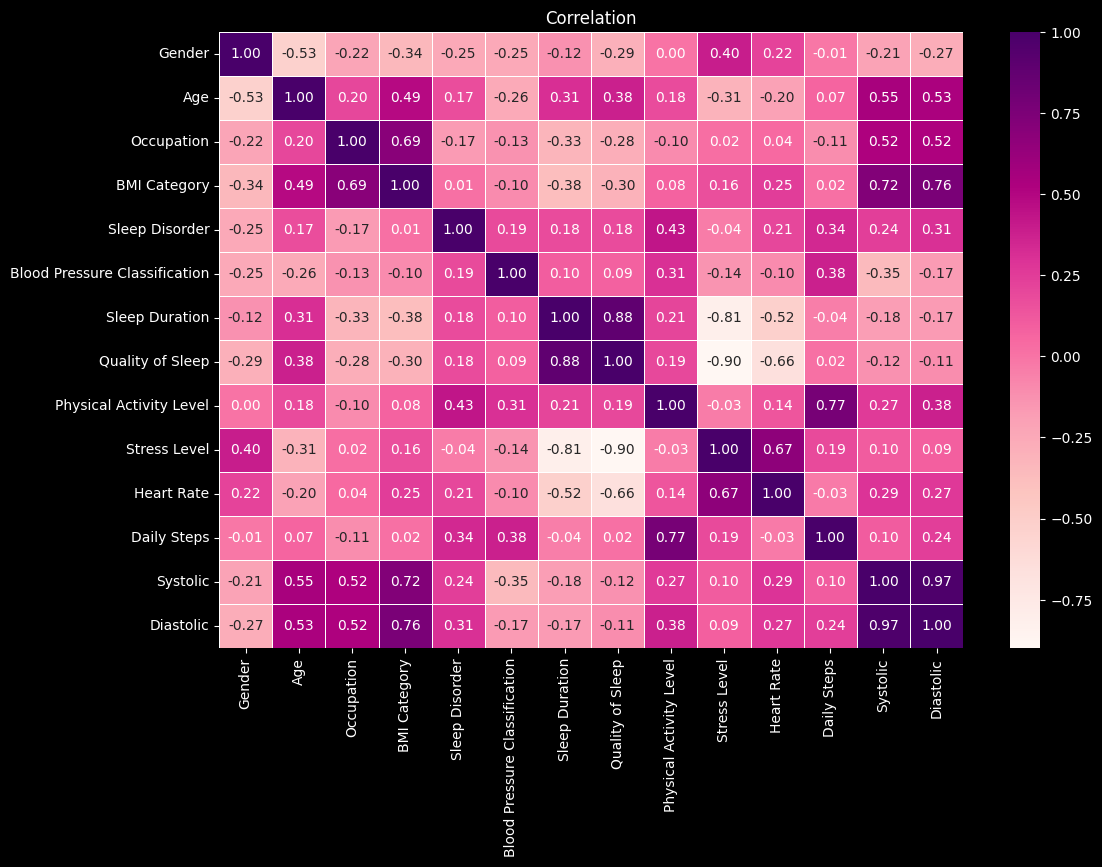

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt= '0.2f', cmap="RdPu", linewidths=0.5)
plt.title('Correlation')
plt.show()

In [46]:
df = df.apply(pd.to_numeric, errors='coerce')

In [47]:
x = df.drop(['Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.8,random_state=42)

In [49]:
Scaler = StandardScaler().fit(x_train)

In [50]:
x_train_scaled = Scaler.transform(x_train)

In [51]:
X_test_scaled = Scaler.transform(x_test)

In [52]:
print(colored("x train shape: ", pink),x_train.shape)
print(colored("x test shape: ", pink),x_test.shape)
print(colored("y train shape: ", pink),y_train.shape)
print(colored("y test shape: ", pink),y_test.shape)

x train shape:  (299, 13)
x test shape:  (75, 13)
y train shape:  (299,)
y test shape:  (75,)


<p style="padding:5px; margin:0; background-color:#89376b; color:#E2EEF3;font-family: 'Roboto'; font-size: 30px; text-align:center;border-radius: 30px 40px">Modeling and Evaluation</p>

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [54]:
train_performance_metrics = {
    "Logistic Regression": {"Accuracy": [], "F1": [], "precision": [], "Recall": []},
    "Random Forest": {"Accuracy": [], "F1": [], "precision": [], "Recall": []},
    "Gradient Boosting": {"Accuracy": [], "F1": [], "precision": [], "Recall": []},
    "SVC": { "Accuracy": [], "F1": [], "precision": [], "Recall": []} }

test_performance_metrics = {
    "Logistic Regression": {"Accuracy": [], "F1": [], "precision": [], "Recall": []},
    "Random Forest": {"Accuracy": [], "F1": [], "precision": [], "Recall": []},
    "Gradient Boosting": {"Accuracy": [], "F1": [], "precision": [], "Recall": []},
    "SVC": { "Accuracy": [], "F1": [], "precision": [], "Recall": []} }

confusion_matrices = {}

In [55]:
models = {
    "Logistic Regression": LogisticRegression(),  
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=1000),
    "SVC": SVC()
}

for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)

    y_train_prediction = model.predict(x_train_scaled)
    y_test_prediction = model.predict(X_test_scaled)

    model_train_accuracy = accuracy_score(y_train, y_train_prediction)
    model_train_f1 = f1_score(y_train, y_train_prediction, average='macro') # Specify average='macro' for multiclass
    model_train_precision = precision_score(y_train, y_train_prediction, average='macro') # Specify average='macro' for multiclass
    model_train_recall = recall_score(y_train, y_train_prediction, average='macro') # Specify average='macro' for multiclass
    train_confusion_matrix = confusion_matrix(y_train, y_train_prediction)
    

    model_test_accuracy = accuracy_score(y_test, y_test_prediction)
    model_test_f1 = f1_score(y_test, y_test_prediction, average='macro') # Specify average='macro' for multiclass
    model_test_precision = precision_score(y_test, y_test_prediction, average='macro') # Specify average='macro' for multiclass
    model_test_recall = recall_score(y_test, y_test_prediction, average='macro') # Specify average='macro' for multiclass
    test_confusion_matrix = confusion_matrix(y_test, y_test_prediction)
    

    train_performance_metrics[model_name]["Accuracy"].append(model_train_accuracy)
    test_performance_metrics[model_name]["Accuracy"].append(model_test_accuracy)

    train_performance_metrics[model_name]["F1"].append(model_train_f1)
    test_performance_metrics[model_name]["F1"].append(model_test_f1)

    train_performance_metrics[model_name]["precision"].append(model_train_precision)
    test_performance_metrics[model_name]["precision"].append(model_test_precision)

    train_performance_metrics[model_name]["Recall"].append(model_train_recall)
    test_performance_metrics[model_name]["Recall"].append(model_test_recall)
    
    

    confusion_matrices[model_name + ' train'] = train_confusion_matrix
    confusion_matrices[model_name + ' test'] = test_confusion_matrix


    print(colored(model_name, pink, attrs=['bold']))
    print('\n')

    print(colored("Model Performance For Training set", pink))
    print(colored("Accuracy Score: ",pink), model_train_accuracy)
    print(colored("Precision Score: ",pink), model_train_precision)
    print(colored("Recall Score: ",pink), model_train_recall)
    print(colored("F1 Score: ",pink), model_train_f1)
    print(colored("Recall Score: ",pink), model_train_recall)
    
    print(colored("______________________________________", pink))

    print(colored("Model Performance For Testing set", pink))
    print(colored("Accuracy Score: ",pink), model_test_accuracy)
    print(colored("Precision Score: ",pink), model_test_precision)
    print(colored("Recall Score: ",pink), model_test_recall)
    print(colored("F1 Score: ",pink), model_test_f1)
    
    print('\n')

Logistic Regression


Model Performance For Training set
Accuracy Score:  0.9230769230769231
Precision Score:  0.9102322661644696
Recall Score:  0.9069806339438808
F1 Score:  0.908502990242367
Recall Score:  0.9069806339438808
______________________________________
Model Performance For Testing set
Accuracy Score:  0.8933333333333333
Precision Score:  0.871135800144368
Recall Score:  0.8594961240310077
F1 Score:  0.860358192996525




Random Forest


Model Performance For Training set
Accuracy Score:  0.9331103678929766
Precision Score:  0.9261732260903379
Recall Score:  0.9198035350864542
F1 Score:  0.9229375190516157
Recall Score:  0.9198035350864542
______________________________________
Model Performance For Testing set
Accuracy Score:  0.88
Precision Score:  0.8409738409738411
Recall Score:  0.8255813953488372
F1 Score:  0.8296146044624747


Gradient Boosting


Model Performance For Training set
Accuracy Score:  0.9331103678929766
Precision Score:  0.9265388707465422
Recall Score:  0.9197153982981588
F1 Score:  0.9229051891943217
Recall Score:  0.9197153982981588
______________________________________
Model Performance For Testing set
Accuracy Score:  0.88
Precision Score:  0.8409738409738411
Recall Score:  0.8255813953488372
F1 Score:  0.8296146044624747


SVC


Model Performance For Training set
Accuracy Score:  0.9331103678929766
Precision Score:  0.9261732260903379
Recall Score:  0.9198035350864542
F1 Score

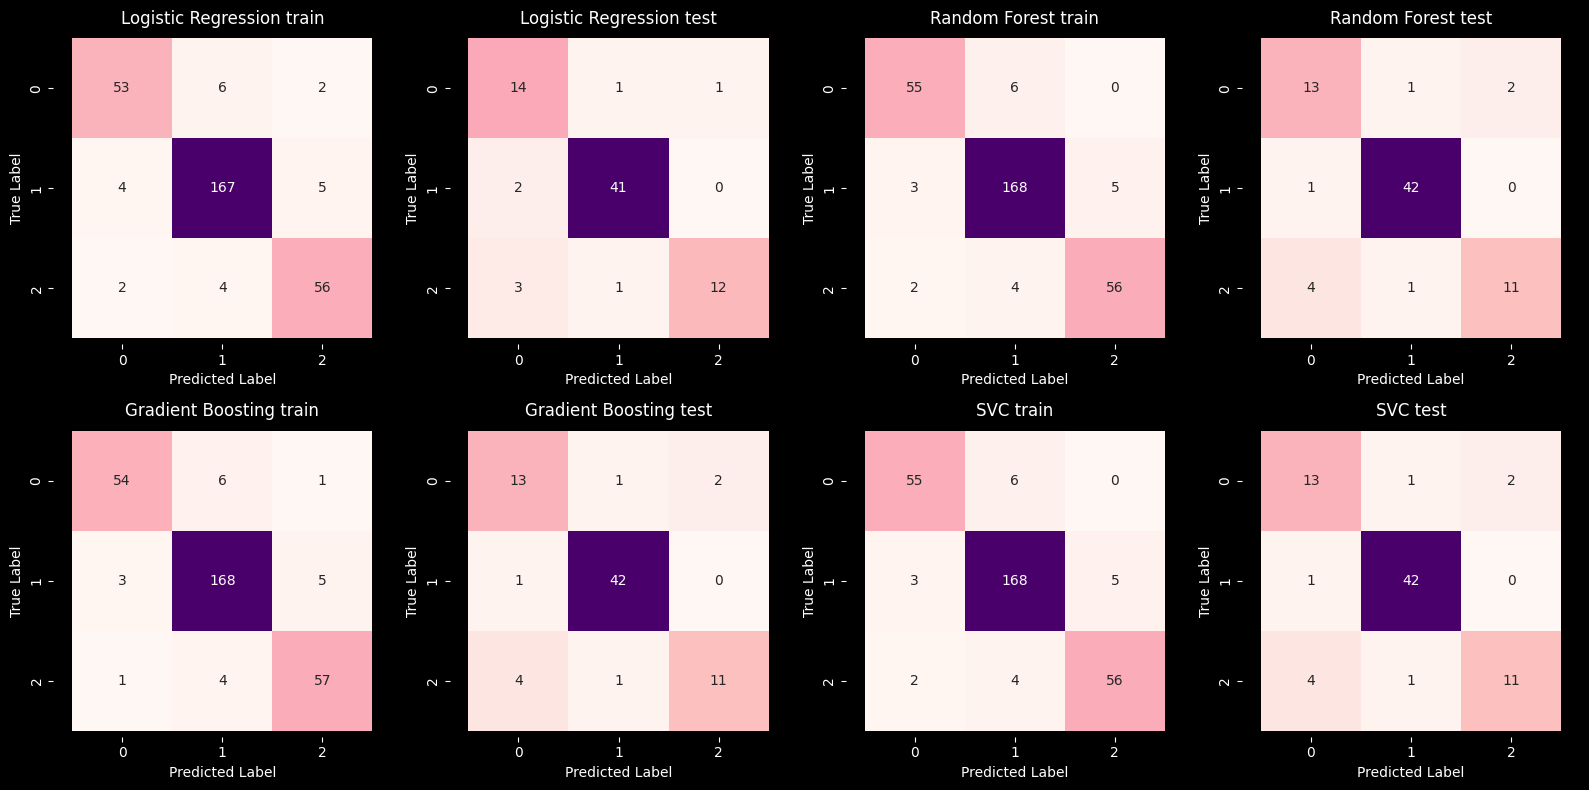

In [56]:
models_list = list(confusion_matrices.keys())
num_models = len(models_list)

# Create subplots with 2 rows and num_models/2 columns
num_rows = 2
num_cols = num_models // 2 + num_models % 2  # Adjust for odd number of models

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, (key, matrix) in enumerate(confusion_matrices.items()):
    row = idx // num_cols
    col = idx % num_cols
    
    ax = axes[row, col]

    sns.heatmap(matrix, annot=True, fmt='d', cmap='RdPu', cbar=False, ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(key)
    ax.axis('equal')

# Hide empty subplots if the number of models is odd
if num_models % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [57]:
train_performance_metrics = pd.DataFrame(train_performance_metrics)
test_performance_metrics = pd.DataFrame(test_performance_metrics)

In [58]:
train_performance_metrics = train_performance_metrics.map(lambda x: x[0] if isinstance(x, list) else x)
test_performance_metrics = test_performance_metrics.map(lambda x: x[0] if isinstance(x, list) else x)

In [59]:
train_performance_metrics.reset_index(inplace=True)
test_performance_metrics.reset_index(inplace=True)

In [60]:
train_performance_metrics.rename(columns={
    'index': 'Metrics'
}, inplace=True)
test_performance_metrics.rename(columns={
    'index': 'Metrics'
}, inplace=True)

In [61]:
train_performance_metrics.style.background_gradient(cmap='RdPu')

,Metrics,Logistic Regression,Random Forest,Gradient Boosting,SVC
0,Accuracy,0.923077,0.933110,0.933110,0.933110
1,F1,0.908503,0.922938,0.922905,0.922938
2,precision,0.910232,0.926173,0.926539,0.926173
3,Recall,0.906981,0.919804,0.919715,0.919804


In [62]:
test_performance_metrics.style.background_gradient(cmap='RdPu')

,Metrics,Logistic Regression,Random Forest,Gradient Boosting,SVC
0,Accuracy,0.893333,0.880000,0.880000,0.880000
1,F1,0.860358,0.829615,0.829615,0.829615
2,precision,0.871136,0.840974,0.840974,0.840974
3,Recall,0.859496,0.825581,0.825581,0.825581


In [63]:
logistic_regression_model = models["Logistic Regression"]
logistic_regression_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [64]:
with open('model.pkl', 'wb') as f:
    pickle.dump(logistic_regression_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(Scaler, f)